# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/my_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
weather_data = pd.DataFrame({"City": cities})

In [4]:
weather_data['Latitude'] = ""
weather_data['Longitude'] = ""
weather_data['Max Temperature'] = ""
weather_data['Humidity'] = ""
weather_data['Cloudiness'] = ""
weather_data['Wind Speed'] = ""
weather_data['Country'] = ""
weather_data['Date'] = ""

In [5]:
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

city_counter = 1

for index, row in weather_data.iterrows():
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    city = row['City']
    response = requests.get(query_url + city).json()
  
    print(f"Processing Record {city_counter} of Set 1 | {city}")
    city_counter += 1    
    
    try:
        weather_data.loc[index, "Latitude"] = response['coord']['lat']
        weather_data.loc[index, "Longitude"] = response['coord']['lon']
        weather_data.loc[index, "Max Temperature"] = response['main']['temp_max']
        weather_data.loc[index, "Humidity"] = response['main']['humidity']
        weather_data.loc[index, "Cloudiness"] = response['clouds']['all']
        weather_data.loc[index, "Wind Speed"] = response['wind']['speed']
        weather_data.loc[index, "Country"] = response['sys']['country']
        weather_data.loc[index, "Date"] = response['dt']
                
    except (KeyError, IndexError): 
        print("City not found. Skipping....")
        
print(f"-----------------------------")
print(f"Data Retrieval Complete")      
print(f"-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | commerce
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | clyde river
Processing Record 5 of Set 1 | cidreira
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | kupang
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | sitka
Processing Record 11 of Set 1 | husavik
Processing Record 12 of Set 1 | norman wells
Processing Record 13 of Set 1 | biak
Processing Record 14 of Set 1 | palmer
Processing Record 15 of Set 1 | bilma
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | manta
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | andra
Processing Record 20 of Set 1 | fort nelson
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | ponta do sol
Processing Record 23 of Set 1 | koprivnica
Processing Rec

Processing Record 188 of Set 1 | remedios
Processing Record 189 of Set 1 | flinders
Processing Record 190 of Set 1 | guaimaro
Processing Record 191 of Set 1 | touros
Processing Record 192 of Set 1 | xichang
Processing Record 193 of Set 1 | pinawa
Processing Record 194 of Set 1 | ngukurr
City not found. Skipping....
Processing Record 195 of Set 1 | temaraia
City not found. Skipping....
Processing Record 196 of Set 1 | khani
Processing Record 197 of Set 1 | sol-iletsk
Processing Record 198 of Set 1 | sola
Processing Record 199 of Set 1 | ust-omchug
Processing Record 200 of Set 1 | provideniya
Processing Record 201 of Set 1 | kingaroy
Processing Record 202 of Set 1 | sompeta
Processing Record 203 of Set 1 | yurimaguas
Processing Record 204 of Set 1 | vaitupu
City not found. Skipping....
Processing Record 205 of Set 1 | goure
Processing Record 206 of Set 1 | myaundzha
Processing Record 207 of Set 1 | hamilton
Processing Record 208 of Set 1 | kinablangan
Processing Record 209 of Set 1 | rus

Processing Record 374 of Set 1 | adeje
Processing Record 375 of Set 1 | hailar
Processing Record 376 of Set 1 | kaeo
Processing Record 377 of Set 1 | lar
Processing Record 378 of Set 1 | tungkang
City not found. Skipping....
Processing Record 379 of Set 1 | mount isa
Processing Record 380 of Set 1 | nisia floresta
Processing Record 381 of Set 1 | codrington
Processing Record 382 of Set 1 | mount hagen
Processing Record 383 of Set 1 | brewster
Processing Record 384 of Set 1 | marsaxlokk
Processing Record 385 of Set 1 | grand centre
City not found. Skipping....
Processing Record 386 of Set 1 | praia da vitoria
Processing Record 387 of Set 1 | guaymas
Processing Record 388 of Set 1 | ozinki
Processing Record 389 of Set 1 | seoul
Processing Record 390 of Set 1 | victor harbor
Processing Record 391 of Set 1 | yichang
Processing Record 392 of Set 1 | miranda
Processing Record 393 of Set 1 | homer
Processing Record 394 of Set 1 | cuenca
Processing Record 395 of Set 1 | sale
Processing Record 

Processing Record 559 of Set 1 | macaboboni
City not found. Skipping....
Processing Record 560 of Set 1 | kroya
Processing Record 561 of Set 1 | mitu
Processing Record 562 of Set 1 | iralaya
Processing Record 563 of Set 1 | port blair
Processing Record 564 of Set 1 | rieti
Processing Record 565 of Set 1 | marcona
City not found. Skipping....
Processing Record 566 of Set 1 | srednekolymsk
Processing Record 567 of Set 1 | caravelas
Processing Record 568 of Set 1 | cururupu
Processing Record 569 of Set 1 | titron
Processing Record 570 of Set 1 | melchor de mencos
Processing Record 571 of Set 1 | seydi
Processing Record 572 of Set 1 | salamiyah
Processing Record 573 of Set 1 | baykit
Processing Record 574 of Set 1 | yenagoa
Processing Record 575 of Set 1 | male
Processing Record 576 of Set 1 | kushiro
Processing Record 577 of Set 1 | verdalsora
City not found. Skipping....
Processing Record 578 of Set 1 | arrecife
Processing Record 579 of Set 1 | douentza
Processing Record 580 of Set 1 | c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
compression_opts = dict(method='zip',
                        archive_name='my_cities.csv')  
weather_data.to_csv('my_cities.zip', index=False,
          compression=compression_opts)  

In [7]:
weather_data.count()

City               613
Latitude           613
Longitude          613
Max Temperature    613
Humidity           613
Cloudiness         613
Wind Speed         613
Country            613
Date               613
dtype: int64

In [8]:
weather_data

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,commerce,34,-118.16,70,77,90,6.8,US,1595440824
1,yellowknife,62.46,-114.35,66.2,82,75,8.05,CA,1595440524
2,barrow,71.29,-156.79,35.6,93,90,8.05,US,1595440535
3,clyde river,70.47,-68.59,46.4,87,90,4.7,CA,1595440526
4,cidreira,-30.18,-50.21,72.82,65,100,4.54,BR,1595440525
...,...,...,...,...,...,...,...,...,...
608,kambove,-10.88,26.6,60.58,46,48,2.44,CD,1595441175
609,parli,18.85,76.53,78.42,87,100,6.33,IN,1595441175
610,ancud,-41.87,-73.82,51.8,57,100,6.93,CL,1595441175
611,hauterive,46.09,3.45,80.6,78,65,6.93,FR,1595441175


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_data["Latitude"] = pd.to_numeric(weather_data["Latitude"], errors='coerce')
weather_data["Max Temperature"] = pd.to_numeric(weather_data["Max Temperature"], errors='coerce')
weather_data["Humidity"] = pd.to_numeric(weather_data["Humidity"], errors='coerce')
weather_data["Cloudiness"] = pd.to_numeric(weather_data["Cloudiness"], errors='coerce')
weather_data["Wind Speed"] = pd.to_numeric(weather_data["Wind Speed"], errors='coerce')

In [10]:
weather_data_humidity = weather_data.loc[weather_data["Humidity"] > 100]
weather_data_humidity

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
weather_data.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,commerce,34.00,-118.16,70.00,77.0,90.0,6.80,US,1595440824
1,yellowknife,62.46,-114.35,66.20,82.0,75.0,8.05,CA,1595440524
2,barrow,71.29,-156.79,35.60,93.0,90.0,8.05,US,1595440535
3,clyde river,70.47,-68.59,46.40,87.0,90.0,4.70,CA,1595440526
4,cidreira,-30.18,-50.21,72.82,65.0,100.0,4.54,BR,1595440525


In [12]:
weather_data.dtypes

City                object
Latitude           float64
Longitude           object
Max Temperature    float64
Humidity           float64
Cloudiness         float64
Wind Speed         float64
Country             object
Date                object
dtype: object

## Latitude vs. Temperature Plot

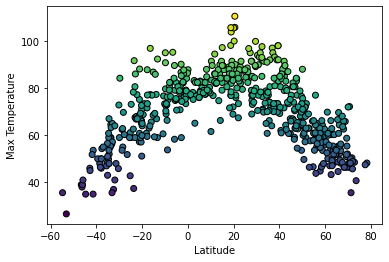

In [13]:
scatter_one = plt.figure()
x_values = weather_data['Latitude']
y_values = weather_data['Max Temperature']
t = y_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.title = ("City Latitude vs Max Temperature (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\latitude_vs_temperature.png")
plt.show()

In [ ]:
#Observation: the closer you get to the equator, the higher the temperature, with the
#PNG image for each scatter plot.

## Latitude vs. Humidity Plot

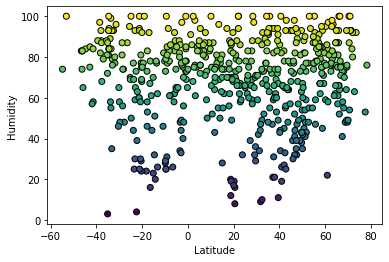

In [14]:
scatter_two = plt.figure()
x_values = weather_data['Latitude']
y_values = weather_data['Humidity']
t = y_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.title = ("City Latitude vs Humidity (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\latitude_vs_humidity.png")
plt.show()

In [ ]:
#Observation
#PNG image for each scatter plot.

## Latitude vs. Cloudiness Plot

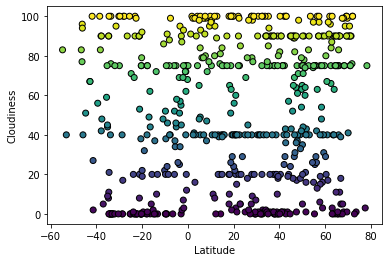

In [15]:
scatter_three = plt.figure()
x_values = weather_data['Latitude']
y_values = weather_data['Cloudiness']
t = y_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.title = ("City Latitude vs Cloudiness (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\latitude_vs_cloudiness.png")
plt.show()

In [ ]:
#Observation
#PNG image for each scatter plot.

## Latitude vs. Wind Speed Plot

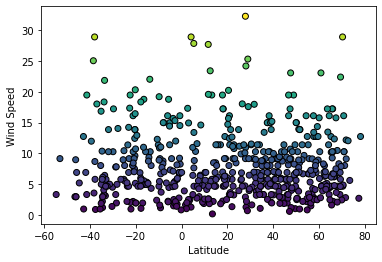

In [16]:
scatter_four = plt.figure()
x_values = weather_data['Latitude']
y_values = weather_data['Wind Speed']
t = y_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.title = ("City Latitude vs Wind Speed (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\latitude_vs_wind_speed.png")
plt.show()

## Linear Regression

In [17]:
northern_hemisphere = weather_data.loc[(weather_data["Latitude"] >= 0)]
northern_hemisphere

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,commerce,34.00,-118.16,70.00,77.0,90.0,6.80,US,1595440824
1,yellowknife,62.46,-114.35,66.20,82.0,75.0,8.05,CA,1595440524
2,barrow,71.29,-156.79,35.60,93.0,90.0,8.05,US,1595440535
3,clyde river,70.47,-68.59,46.40,87.0,90.0,4.70,CA,1595440526
5,ribeira grande,38.52,-28.7,73.40,69.0,40.0,10.29,PT,1595440536
...,...,...,...,...,...,...,...,...,...
604,batagay,67.63,134.63,63.61,58.0,5.0,3.69,RU,1595440837
605,brigantine,39.41,-74.36,98.01,49.0,19.0,1.99,US,1595441174
607,kolosovka,56.47,73.61,56.41,78.0,13.0,7.27,RU,1595441174
609,parli,18.85,76.53,78.42,87.0,100.0,6.33,IN,1595441175


In [18]:
southern_hemisphere = weather_data.loc[(weather_data["Latitude"] < 0)]
southern_hemisphere

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
4,cidreira,-30.18,-50.21,72.82,65.0,100.0,4.54,BR,1595440525
6,kupang,-10.17,123.58,73.31,78.0,22.0,11.39,ID,1595441086
8,rikitea,-23.12,-134.97,67.53,59.0,100.0,14.23,PF,1595440523
12,biak,-0.91,122.88,76.64,84.0,72.0,6.71,ID,1595440782
16,manta,-0.95,-80.73,77.00,73.0,40.0,6.93,EC,1595440581
...,...,...,...,...,...,...,...,...,...
599,tautira,-17.73,-149.15,73.40,83.0,75.0,1.12,PF,1595440804
602,namatanai,-3.67,152.43,78.89,80.0,51.0,7.14,PG,1595441173
606,saurimo,-9.66,20.39,70.29,25.0,0.0,5.48,AO,1595441174
608,kambove,-10.88,26.6,60.58,46.0,48.0,2.44,CD,1595441175


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
def scatters(x_values, y_values, ylabel, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    t = y_values
    plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
    plt.plot(x_values,regress_values,"r-") 
    plt.annotate(line_eq, coordinates, fontsize=14, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)

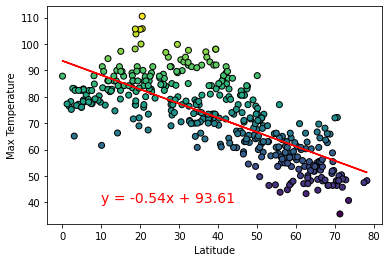

In [20]:
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Max Temperature']
scatters(x_values, y_values, "Max Temperature", (10,40))
plt.title = ("City Latitude vs Max Temperature: Northern Hemisphere (7/22/2020)")
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\northern_latitude_vs_temperature.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

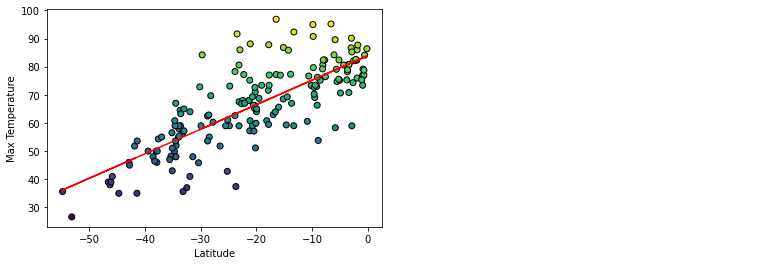

In [21]:
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Max Temperature']
scatters(x_values, y_values, "Max Temperature", (50,40))
plt.title = ("City Latitude vs Max Temperature: Southern Hemisphere (7/22/2020)")
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\southern_latitude_vs_temperature.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

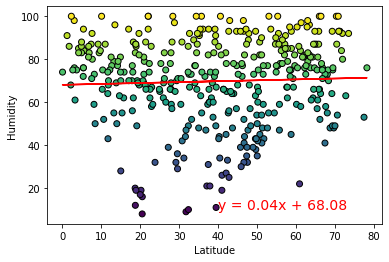

In [22]:
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Humidity']
scatters(x_values, y_values, "Humidity", (40,10))
plt.title = ("City Latitude vs Humidity: Northern Hemisphere (7/22/2020)")
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\northern_latitude_vs_humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

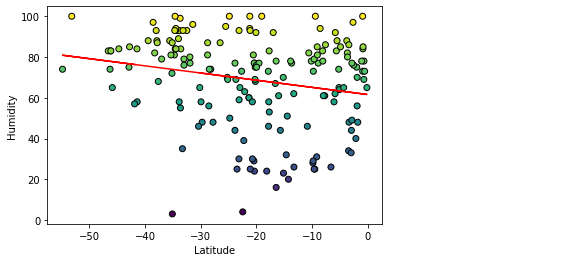

In [23]:
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Humidity']
scatters(x_values, y_values, "Humidity", (10,40))
plt.title = ("City Latitude vs Humidity: Southern Hemisphere (7/22/2020)")
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\southern_latitude_vs_humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

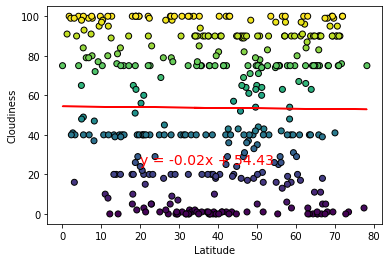

In [24]:
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Cloudiness']
scatters(x_values, y_values, "Cloudiness", (20,25))
plt.title = ("City Latitude vs Cloudiness: Northern Hemisphere (7/22/2020)")
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\northern_latitude_vs_cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

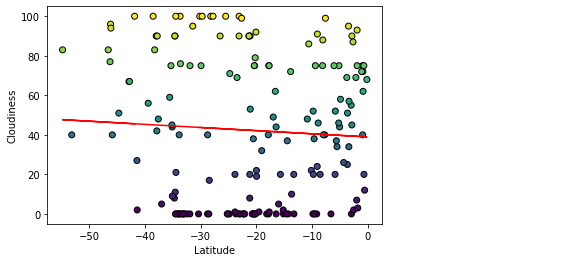

In [25]:
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Cloudiness']
scatters(x_values, y_values, "Cloudiness", (10,40))
plt.title = ("City Latitude vs Cloudiness: Southern Hemisphere (7/22/2020)")
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\southern_latitude_vs_cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

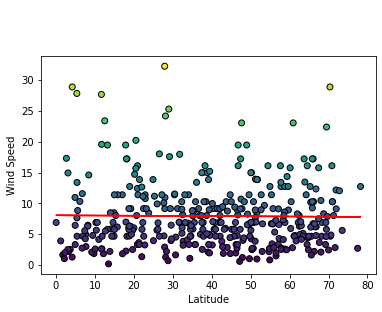

In [26]:
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Wind Speed']
scatters(x_values, y_values, "Wind Speed", (10,40))
plt.title = ("City Latitude vs Wind Speed: Northern Hemisphere (7/22/2020)")
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\northern_latitude_vs_wind_speed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

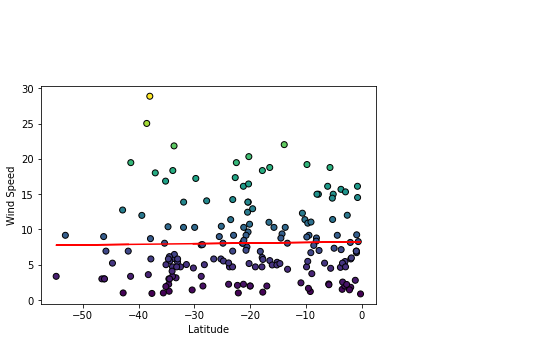

In [27]:
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Wind Speed']
scatters(x_values, y_values, "Wind Speed", (10,40))
plt.title = ("City Latitude vs Wind Speed: Southern Hemisphere (7/22/2020)")
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\southern_latitude_vs_wind_speed.png")
plt.show()